In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
years = list(range(1997,2017,1))

In [3]:
file_names = ["Data100%s.xls" % x for x in years]

In [4]:
file_paths = ["/media/artemk/Data/POPs/RATS/%s" % x for x in file_names]

In [5]:
RATS_sheet_names = ["Density", "Temperature", "Salinity","Chlorophyll","PAR", "Strat"]

In [6]:
def Rats_converter(name): #not suitable for Strat
    name = str(name)
    columns_names_1 = ["year", "month", "day",  "Event", "MLD"]
    columns_names_2 = list(range(1,101))
    columns_names = columns_names_1 + columns_names_2
    dfx = pd.DataFrame()
    for x in file_paths:
        excel = pd.read_excel(x, name, skiprows = 2)
        dfx = dfx.append(excel)
    dfx.reset_index(inplace=True)
    dfx.drop('index', axis=1, inplace=True)
    dfx.columns = columns_names
    dfx.to_csv("/media/artemk/Data/POPs/RATS/%s.csv" % name, header=True, index=False)

In [7]:
Rats_converter(name="Density")

In [8]:
df_density = pd.read_csv("/media/artemk/Data/POPs/RATS/Density.csv", parse_dates=[["year", "month", "day"]])
df_density.drop('Event', axis=1, inplace=True)

In [11]:
df_density.head(3)

,year_month_day,MLD,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1998-01-02,3,26.060254,26.088742,26.110251,26.138357,26.180466,26.212770,26.233976,26.253681,...,27.129025,27.129424,27.130428,27.131266,27.131969,27.132712,27.134112,27.136789,27.142753,27.152694
1,1998-01-14,1,25.173462,25.607802,25.954171,26.178559,26.327840,26.380065,26.404467,26.426026,...,27.265396,27.272824,27.283433,27.290331,27.294107,27.296084,27.297151,27.303671,27.310539,27.312859
2,1998-01-20,1,25.405984,25.592794,25.741478,25.845327,25.912701,25.972181,26.015282,26.049832,...,27.129682,27.136731,27.138540,27.140451,27.144443,27.147141,27.151460,27.160158,27.170700,27.178225


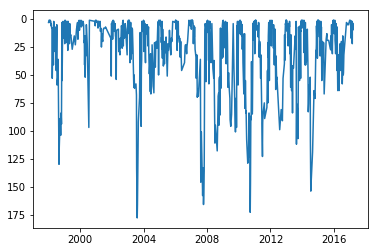

In [17]:
plt.plot(df_density['year_month_day'], df_density['MLD'])
plt.gca().invert_yaxis()
plt.show()